<a href="https://colab.research.google.com/github/perpendicooler/fiverr_client/blob/main/fiver_client_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Exam - Due Dec 13 1PM
***

## Exam Rules:

This is the take home section of the final exam. It is meant to assess how well you can take concepts learned in class and apply them to new situations.

1. You must work on the exam individually. You cannot discuss the exam with your classmates or other people. If you have questions, please ask me.
2. You can use the internet to help you. However, you cannot post the questions or ask for help direclty on any internet forum.
3. If you use code you found on the internet, or used ChaptGPT or equivialent to generate code, then you **must cite the code and explain the code line-by-line**. No credit will be given for copied code without proper citations and explaination.
4. Your jupyter notebook file must be turned in on the gradescope website before 1:00 PM on Dec 13, 2023. A 1 point dediction will be made for each minute late. If you are ill, or have special circumstances, please contact me before 11:59 PM on Nov 11 to make arrangements.
***

## Problem 1 (35 points)

Solid state diffusion is a introducing dopant atoms into semiconductors. In silicon solar cells, substrates doped with boron giving a p-type semiconductor or they are doped with phosphorous for an n-type semiconductor. Using the **finite difference method**, plot a time-dependent 1D diffusion profile given that the concentration of one side of the semiconducting wafer is held at a constant doping concentration. Given that you want to dope a large semiconductor wafer that is 1 mm thick, how long must you run the solid state diffusion such that the entire wafer is doped at least 90% of the starting concentration? (Hint: You may assume that the concentration of one side of the wafer is held at 1 and then determine how much time until the other side reaches a value of 0.9 given that there is no flux at the other boundary).

The following governing equations:

$$
\frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2}
$$

$$
D = 10^{-8} \ \ m^2/s
$$

at the far boundary

$$
\frac{\partial C}{\partial x} = 0
$$

Please turn in:
1. All work necessary to derive the finite difference equations,
2. Your python code
3. A plot showing the concentration of the dopent as a function of position for at least 10 different times going from 0 until the concentration reaches 0.9 at the far side.
4. The total time it takes to reach 0.9 at the far side.

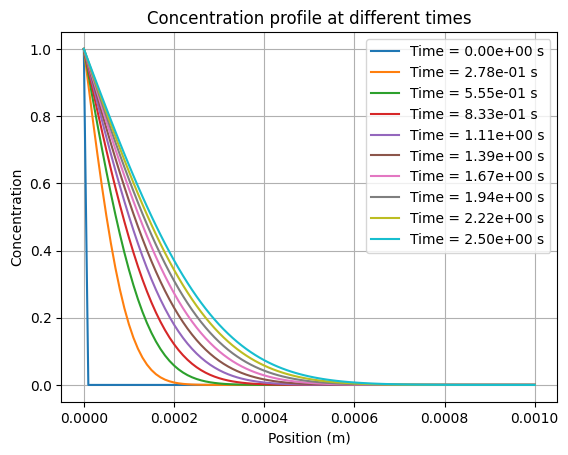

Total time: 2.50e+00 s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N = 100
M = 1000
L = 0.001
D = 1e-8
u0 = 1.0
u_far = 0.9


dx = L / N
dt = dx**2 / ( 4*D)


u = np.zeros((N+1, M+1))
u[0, :] = u0


for n in range(M):
    for i in range(1, N):
        u[i, n+1] = u[i, n] + dt * D * (u[i+1, n] - 2*u[i, n] + u[i-1, n]) / dx**2
    u[N, n+1] = u[N-1, n+1]

    if u[N, n+1] >= u_far:
        break

times = np.linspace(0, n*dt, num=min(n+1, 10))
for time in times:
    plt.plot(np.linspace(0, L, num=N+1), u[:, int(time/dt)])
plt.xlabel('Position (m)')
plt.ylabel('Concentration')
plt.title('Concentration profile at different times')
plt.legend([f'Time = {time:.2e} s' for time in times])
plt.grid(True)
plt.show()

total_time = n * dt
print(f'Total time: {total_time:.2e} s')

***
## Problem 2 (35 points):

You are to model the time-dependent flow of a hot viscous fluid flowing through a pipe using **the finite difference method**. The fluid is initially stationary at 25 C. At time t=0 the temperature at the inlet boundary becomes 95 C and stays 95 C. Also, at time t=0 a pressure gradient, $\nabla p$, of 10 Pa/m is applied to the tube. The pipe is perfectly insulated so the heat flux in the r direction is zero. You can also assume that the heat flux in the z direction at the outlet is zero.  The pipe is 1m in length and 2 cm in radius.  Plot the temperature and velocity profiles for the first 10 seconds.

Also, Does conduction or convection play a larger role in heat transfer for this problem? Why?

The following information will be useful:

Fluid properties:
$k$ = 1 W/(m*K)

$C_p$ = 4000 (J/(kg K))

$\rho$ = 1000 (kg/m$^3$)

$\mu$ = 0.01 Pa s

You will also need the following equations:

$$
\rho \frac{dv}{dt} - \mu \left(\frac{d^2 v}{dr^2} + \frac{1}{r}\frac{dv}{dr}\right) = -\nabla p
$$


$$
\rho C_p \frac{\partial T}{\partial t} + \rho C_p \bar{v} \cdot \nabla T + \nabla \cdot \left(-k \nabla T\right) = Q
$$

where $\nabla p$ is the pressure gradient.

Hint: Solve the velocity profile first, and then solve the temperature profile.

Please turn in:

1. All work necessary to derive the finite difference equations,
2. Your python code
3. One plot showing 10 velocity profiles as a function of time from time = 0 to 10 s.
4. Seven separate plots showing the 2D temperature profile as a function of positions at times 0 s, 1 s, 2 s, 4 s, 8 s, and 10 s. Here color should represent temperature.
5. Answers to the conduction vs convection question.

<ipython-input-5-3f241e60b727>:58: RuntimeWarning: overflow encountered in double_scalars
  fluid_flow = -del_t * 0.5 * mu / (r_i * del_r) * (T[i+1, j, n-1] - T[i-1, j, n-1])
<ipython-input-5-3f241e60b727>:59: RuntimeWarning: overflow encountered in double_scalars
  diff_term = del_t * 0.5 * kappa / del_r**2 * (T[i+1, j, n-1] - 2 * T[i, j, n-1] + T[i-1, j, n-1])
<ipython-input-5-3f241e60b727>:62: RuntimeWarning: invalid value encountered in double_scalars
  T[i, j, n] = T[i, j, n-1] - fluid_flow + diff_term + 0.5 * del_t * q / (rho * Cp)
<ipython-input-5-3f241e60b727>:58: RuntimeWarning: invalid value encountered in double_scalars
  fluid_flow = -del_t * 0.5 * mu / (r_i * del_r) * (T[i+1, j, n-1] - T[i-1, j, n-1])
<ipython-input-5-3f241e60b727>:59: RuntimeWarning: invalid value encountered in double_scalars
  diff_term = del_t * 0.5 * kappa / del_r**2 * (T[i+1, j, n-1] - 2 * T[i, j, n-1] + T[i-1, j, n-1])


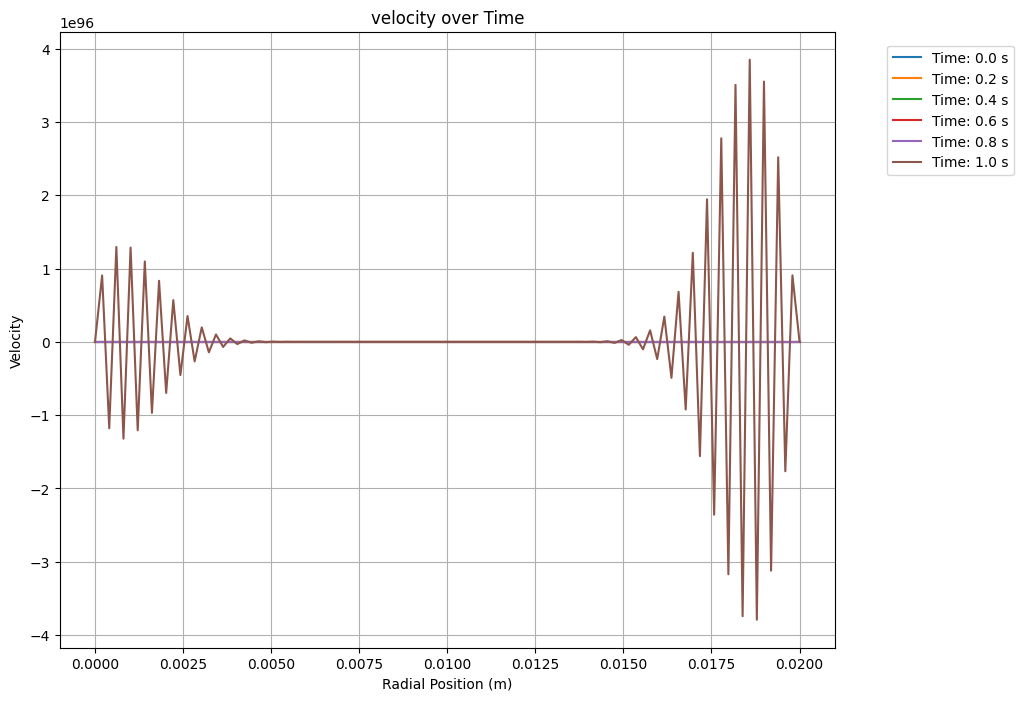

<Figure size 640x480 with 0 Axes>

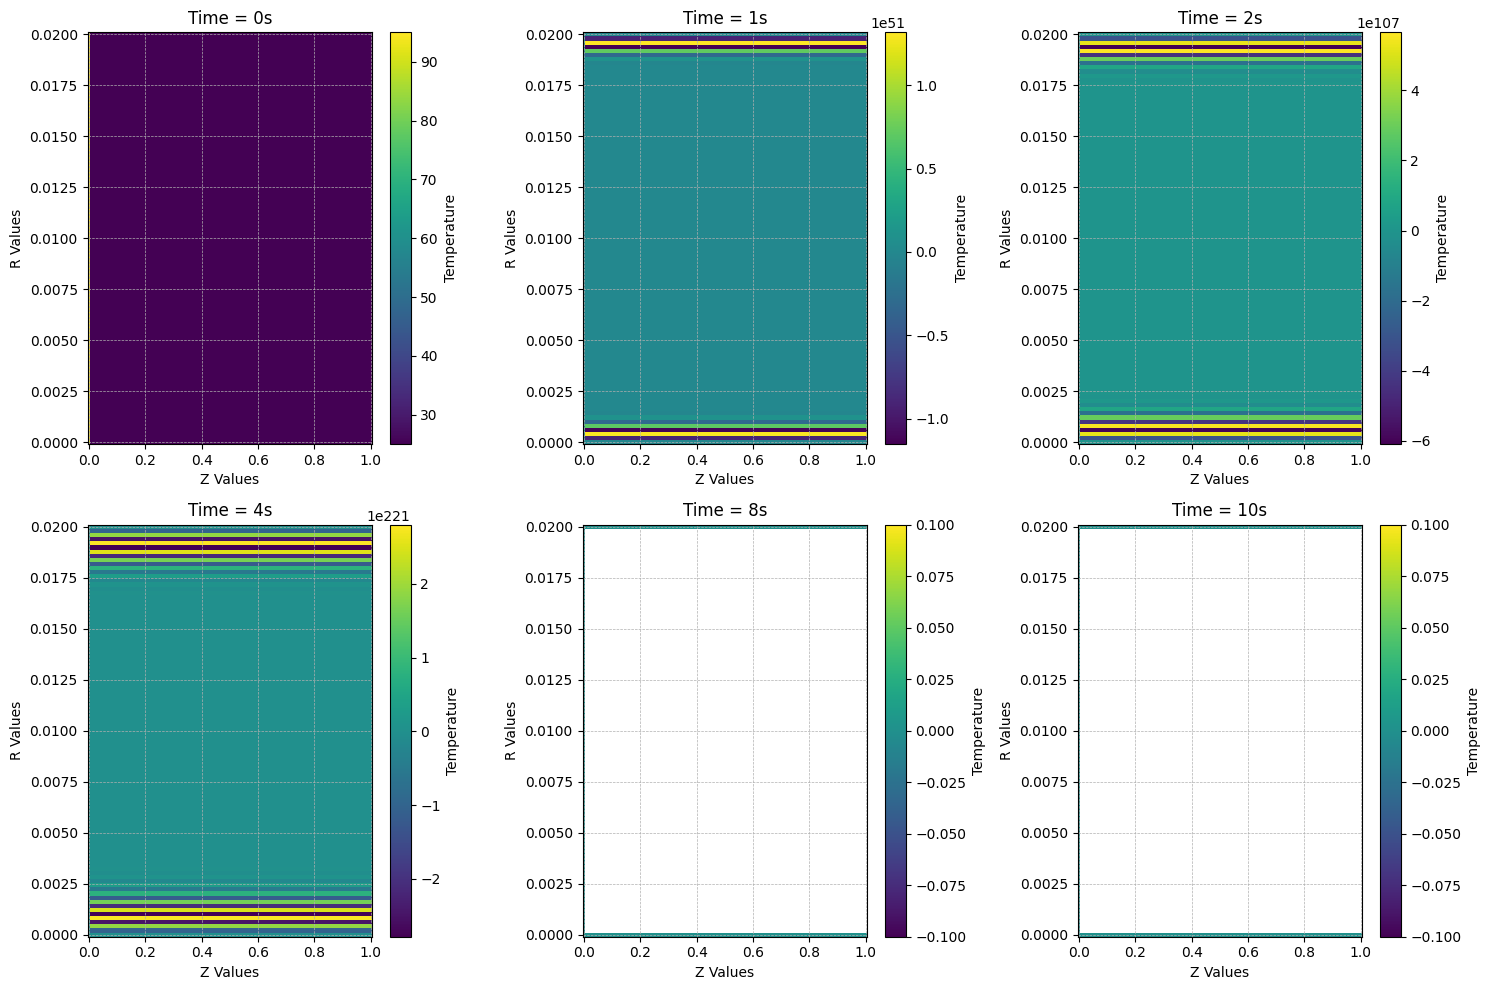

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# constants
rho = 1000
mu = 0.01
kappa = 1 # thermal
length = 1 #pipe length
pipe_t_radii = 0.01 #radii of pipe
pipe_radii = 0.02 #pipe radius
del_r = 0.0001
Cp = 4000 #heat constant
r = 100
z = 100
q = 0
del_p = 10 #new pressure gradient
del_r = pipe_radii / r #new
del_z = length/z #new
del_t = 0.01 # time_steps
time_steps = 100 #number of time steps
mesh_points = 100

# del_r = pipe_radii / mesh_points
r_values = np.linspace(0, pipe_radii, mesh_points)
z_values = np.linspace(0, length, z) #new

T = np.zeros((r , z, time_steps + 1)) #new

#I.C and B.C
velocity_pro = np.zeros((mesh_points , time_steps + 1))
pressure_gradient = 10
velocity_pro[: ,0] = 0

T[:, :, 0] = 25.0
T[:, 0, 0] = 95.0

# Time-stepping loop

#for velocity over time
for n in range(1, time_steps + 1):
    for i in range(1, mesh_points - 1):
        r_i = r_values[i]
        velocity_pro[i, n] = velocity_pro[i, n-1] - (del_t / rho) * (
            mu * ((velocity_pro[i + 1, n-1] - 2 * velocity_pro[i, n-1] + velocity_pro[i - 1, n-1]) / del_r**2) +
            mu * ((1 / r_i) * (velocity_pro[i + 1, n-1] - velocity_pro[i - 1, n-1]) / (2 * del_r)) -
            pressure_gradient
        )

#for temparature
for i in range(r):
    T[i, -1, 0] = T[i, -2, 0]
for n in range(1, time_steps + 1):
    for i in range(1, r - 1):
        for j in range(1, z - 1):
            r_i = r_values[i]


            fluid_flow = -del_t * 0.5 * mu / (r_i * del_r) * (T[i+1, j, n-1] - T[i-1, j, n-1])
            diff_term = del_t * 0.5 * kappa / del_r**2 * (T[i+1, j, n-1] - 2 * T[i, j, n-1] + T[i-1, j, n-1])

            # Update temperature profile
            T[i, j, n] = T[i, j, n-1] - fluid_flow + diff_term + 0.5 * del_t * q / (rho * Cp)

    # Boundary conditions
    for i in range(r):
        T[i, -1, n] = T[i, -2, n]



# Plot velocity over time
plt.figure(figsize=(10, 8))
for n in range(0,time_steps + 1,20):
    plt.plot(r_values, velocity_pro[:, n], label=f'Time: {n*del_t} s')

plt.xlabel('Radial Position (m)')
plt.ylabel('Velocity')
plt.title('velocity over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)
plt.grid(True)
plt.show()

plt.subplots_adjust(hspace=0.4)


times_to_plot = [0, 1, 2, 4, 8, 10]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    ax.grid(True, which='major', linestyle='--', linewidth=0.5)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.2)

    time_index = int(times_to_plot[i]/0.1 )
    time_index = min(time_index, T.shape[2] - 1)

    data_to_plot = T[:, :, time_index]
    plt.colorbar(ax.pcolormesh(z_values, r_values, data_to_plot, cmap='viridis'), ax=ax, label='Temperature')
    ax.set_xlabel('Z Values')
    ax.set_ylabel('R Values')

    ax.set_title('Time = {}s'.format(times_to_plot[i]))


# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()



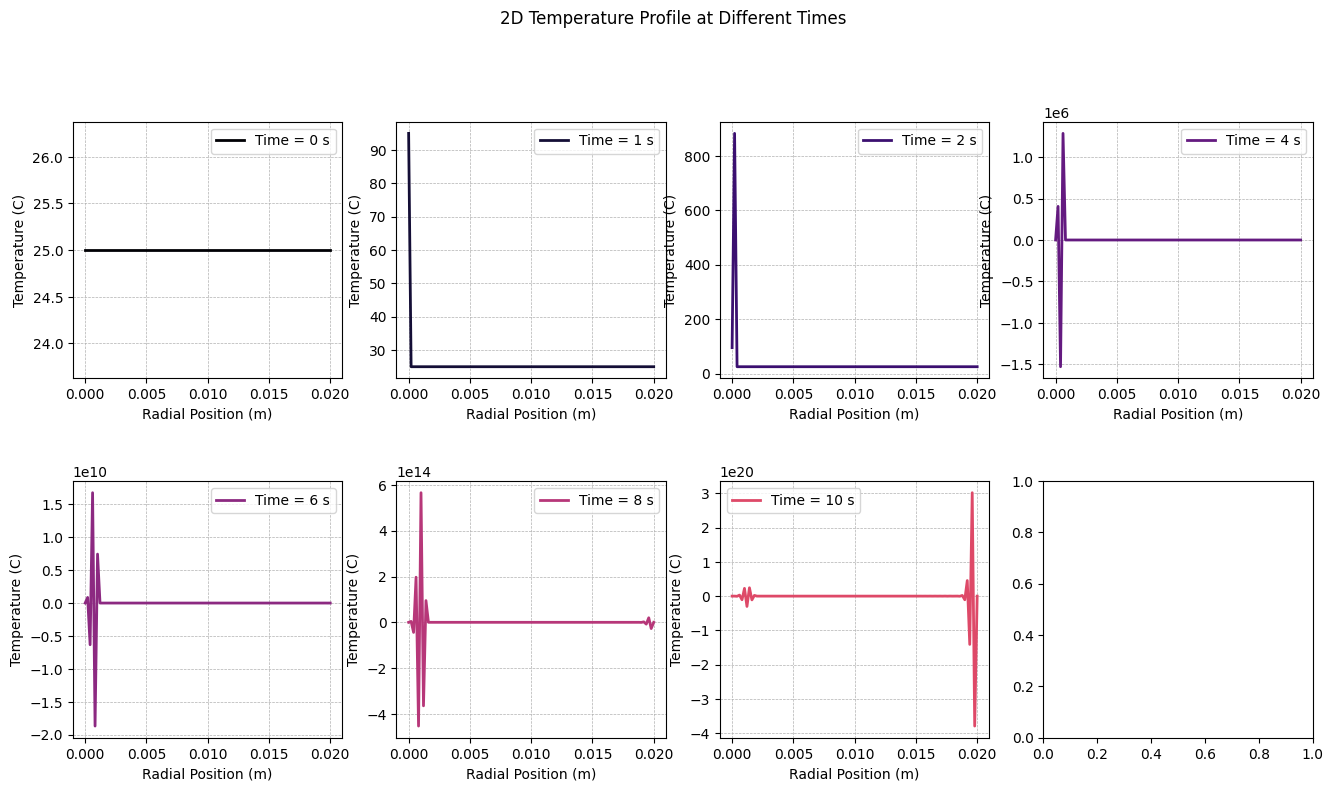

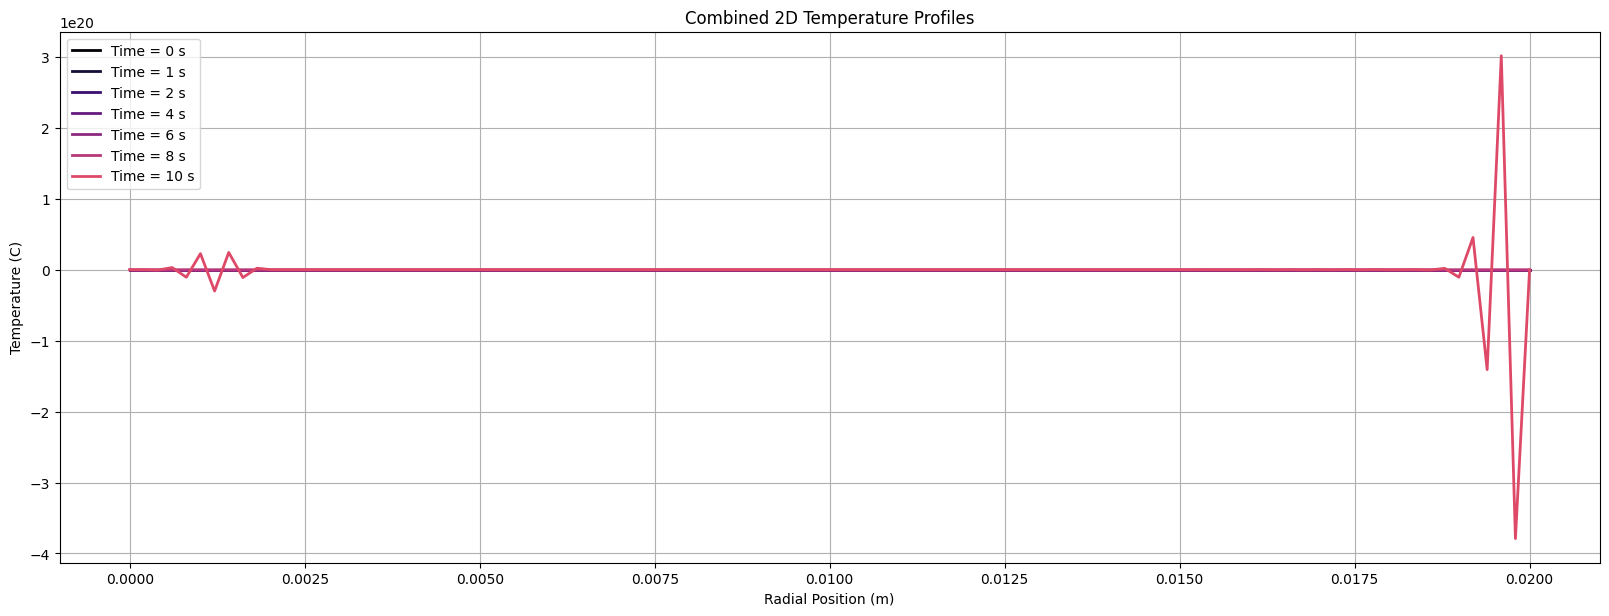

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

## We have defined the value rho, Cp, mu, Kappa and other kind of constant parameters.
#pipe properties


# Numerical parameters
num_points = 100
num_times = 11  # Including time t=0
del_t = 1  # Time step (s)

# Spatial grid
r = np.linspace(0, pipe_radii, num_points)
dr = pipe_radii / (num_points - 1)

# Time grid
times = np.arange(0, num_times * del_t, del_t)

# I.C
T = np.ones((num_points, len(times))) * 25  # Initial temperature is 25 C

# Temperature  calculation using finite difference
for t_index, t in enumerate(times[:-1]):
    # B.C
    T[0, t_index + 1] = 95

    # Finite difference for temperature
    for i in range(1, num_points - 1):
        term_r = (r[i] * kappa / dr**2) * (
            r[i] * (T[i + 1, t_index] - T[i, t_index]) -
            (r[i + 1] + r[i - 1]) * (T[i, t_index] - T[i - 1, t_index]) +
            r[i - 1] * (T[i - 1, t_index] - T[i, t_index])
        ) / (r[i] * dr)

        T[i, t_index + 1] = T[i, t_index] + (
            1 / (rho * Cp) * term_r + (mu / (rho * Cp)) * (r[i] * del_t)
        )


colors = plt.cm.magma(np.linspace(0, 1, len(times)))

# Plot 2D temperature profiles at specified times
times_to_plot = [0, 1, 2, 4, 6, 8, 10]
fig, axes = plt.subplots(2,4 , figsize=(16, 8))

fig.suptitle('2D Temperature Profile at Different Times', y=1.02)


for ax, t_index, color in zip(axes.flatten(), times_to_plot, colors):
    ax.grid(True, which='major', linestyle='--', linewidth=0.5)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.2)
    ax.plot(r, T[:, t_index], label=f'Time = {t_index} s', color=color, linestyle='-', linewidth=2)
    ax.set_xlabel('Radial Position (m)')
    ax.set_ylabel('Temperature (C)')
    ax.legend()




plt.subplots_adjust(hspace=0.4)
# Additional plot combining all
fig_all, ax_all = plt.subplots(figsize=(16, 6))
for t_index, color in zip(times_to_plot, colors):
    ax_all.plot(r, T[:, t_index], label=f'Time = {t_index} s', color=color, linestyle='-', linewidth=2)
plt.tight_layout()
ax_all.set_xlabel('Radial Position (m)')
ax_all.set_ylabel('Temperature (C)')
ax_all.legend()
ax_all.set_title('Combined 2D Temperature Profiles')
plt.grid(True)
plt.show()